Сравнение галактик на разных $z$

Перевод между $z$ и $t$ 

In [1]:
import numpy as np
from astropy.cosmology import Planck13
birth  = Planck13.lookback_time(np.Infinity)
z = np.array([0.00 , 0.10 ,0.18 , 0.27, 0.37 ,0.50,0.62,0.74,0.87,1.00,1.26, 1.49 ,1.74,2.01,2.24,2.48,3.02,3.53,3.98, 
4.49,5.04,5.49,5.97, 7.05,8.07,8.99,9.99,15.13,20.00])


t = birth - Planck13.lookback_time(z)
   

| номер snapshot | z | time|
|----------------|---|-----|
|<span style="color:green"> 28</span> |<span style="color:green"><span style="color:green"> 0.0 </span>| <span style="color:green">13.796290756455353 Gyr</span> |
|<span style="color:green"> 27</span> |<span style="color:green"><span style="color:green"> 0.1 </span>| <span style="color:green">12.453025465217658 Gyr</span> |
|<span style="color:green"> 26</span> |<span style="color:green"><span style="color:green"> 0.18 </span>| <span style="color:green">11.507705854158342 Gyr</span> |
|<span style="color:green"> 25</span> |<span style="color:green"><span style="color:green"> 0.27 </span>| <span style="color:green">10.56216836207113 Gyr</span> |
|<span style="color:green"> 24</span> |<span style="color:green"><span style="color:green"> 0.37 </span>| <span style="color:green">9.63796705672754 Gyr</span> |
|<span style="color:green"> 23</span> |<span style="color:green"><span style="color:green">  0.5 </span>| <span style="color:green">8.604260730764306 Gyr</span> |
| 22 | 0.62 | 7.790231632018335 Gyr|
| 21 | 0.74 | 7.087427930697648 Gyr|
| 20 | 0.87 | 6.43029726577336 Gyr|
| 19 | 1.0 | 5.8631650236121295 Gyr|
| 18 | 1.26 | 4.940717072213719 Gyr|
| 17 | 1.49 | 4.3030262317603825 Gyr|
| 16 | 1.74 | 3.748058337730779 Gyr|
| 15 | 2.01 | 3.268506935702211 Gyr|
| 14 | 2.24 | 2.934015361903313 Gyr|
| 13 | 2.48 | 2.6409096252006865 Gyr|
| 12 | 3.02 | 2.133069147310044 Gyr|
| 11 | 3.53 | 1.785868768280558 Gyr|
| 10 | 3.98 | 1.5506167435497566 Gyr|
| 9 | 4.49 | 1.3404056231081753 Gyr|
| 8 | 5.04 | 1.161962438099291 Gyr|
|<span style="color:red"> 7</span> |<span style="color:red"><span style="color:red"> 5.49 </span>| <span style="color:red">1.0433963343894774 Gyr</span> |
| 6 | 5.97 | 0.937568957595774 Gyr|
| 5 | 7.05 | 0.7553558482683869 Gyr|
| 4 | 8.07 | 0.6314857698398431 Gyr|
| 3 | 8.99 | 0.5461766492425735 Gyr|
| 2 | 9.99 | 0.47322216264559636 Gyr|
| 1 | 15.13 | 0.2656906567020023 Gyr|
| 0 | 20.0 | 0.17854772111176587 Gyr|


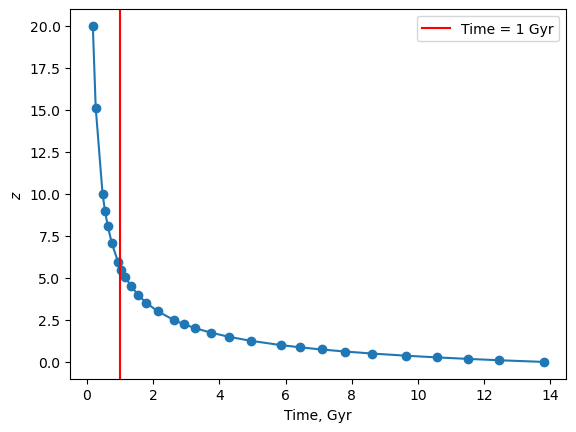

In [2]:
from matplotlib import pyplot as plt

plt.figure()
plt.plot(t, z, '-o')
plt.gca().axvline(1.0, color='red', label='Time = 1 Gyr')
plt.xlabel('Time, Gyr')
plt.ylabel('$z$')
plt.legend()
plt.show()

Для поиска галактик используется дерево слияний. Загрузим список галактик без баров

In [3]:
import pandas as pd
barred = pd.read_csv('tabels/barred.csv')
galaxies = []
for n, k in zip(barred['GalaxyID'], barred['Barred']):
    if k == 0:
        galaxies.append(n)
print(galaxies)

[737885, 746518, 754151, 763033, 770934, 817104, 878368, 892497, 912390, 917940, 924755, 950105, 955249, 959840, 971267, 1608845, 1681524, 1785362]


Качаем координаты галактики на разных $z$ через sql запрос

In [4]:
import subprocess as sp
username = 'nnm778'
password = 'YL41er05'

for gal in galaxies:
    req = '''select SH.GalaxyID, SH.Redshift as z, SH.SubGroupNumber, SH.CentreOfPotential_x, SH.CentreOfPotential_y, SH.CentreOfPotential_z,SH.Image_Face as face FROM RecalL0025N0752_Subhalo as SH , RecalL0025N0752_Subhalo as REF WHERE REF.GalaxyID=%s and ((SH.SnapNum > REF.SnapNum and REF.GalaxyID between SH.GalaxyID and SH.TopLeafID ) or (SH.SnapNum <= REF.SnapNum and SH.GalaxyID between REF.GalaxyID and REF.TopLeafID )) ORDER BY SH.Redshift''' %gal
    url = 'http://galaxy-catalogue.dur.ac.uk:8080/Eagle?action=doQuery&SQL=%s' %req
    print(url)
    sp.call('wget --http-user=%s --http-passwd=%s -o result.csv "%s" ' %(username, password, url), shell=True)
    sp.call('mv Eagle?action* evolution/%s.csv' %gal, shell=True)


http://galaxy-catalogue.dur.ac.uk:8080/Eagle?action=doQuery&SQL=select SH.GalaxyID, SH.Redshift as z, SH.SubGroupNumber, SH.CentreOfPotential_x, SH.CentreOfPotential_y, SH.CentreOfPotential_z,SH.Image_Face as face FROM RecalL0025N0752_Subhalo as SH , RecalL0025N0752_Subhalo as REF WHERE REF.GalaxyID=737885 and ((SH.SnapNum > REF.SnapNum and REF.GalaxyID between SH.GalaxyID and SH.TopLeafID ) or (SH.SnapNum <= REF.SnapNum and SH.GalaxyID between REF.GalaxyID and REF.TopLeafID )) ORDER BY SH.Redshift
http://galaxy-catalogue.dur.ac.uk:8080/Eagle?action=doQuery&SQL=select SH.GalaxyID, SH.Redshift as z, SH.SubGroupNumber, SH.CentreOfPotential_x, SH.CentreOfPotential_y, SH.CentreOfPotential_z,SH.Image_Face as face FROM RecalL0025N0752_Subhalo as SH , RecalL0025N0752_Subhalo as REF WHERE REF.GalaxyID=746518 and ((SH.SnapNum > REF.SnapNum and REF.GalaxyID between SH.GalaxyID and SH.TopLeafID ) or (SH.SnapNum <= REF.SnapNum and SH.GalaxyID between REF.GalaxyID and REF.TopLeafID )) ORDER BY SH.R

http://galaxy-catalogue.dur.ac.uk:8080/Eagle?action=doQuery&SQL=select SH.GalaxyID, SH.Redshift as z, SH.SubGroupNumber, SH.CentreOfPotential_x, SH.CentreOfPotential_y, SH.CentreOfPotential_z,SH.Image_Face as face FROM RecalL0025N0752_Subhalo as SH , RecalL0025N0752_Subhalo as REF WHERE REF.GalaxyID=1785362 and ((SH.SnapNum > REF.SnapNum and REF.GalaxyID between SH.GalaxyID and SH.TopLeafID ) or (SH.SnapNum <= REF.SnapNum and SH.GalaxyID between REF.GalaxyID and REF.TopLeafID )) ORDER BY SH.Redshift


Посмотрим эволюцию галактики сквозь различные $z$

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
from astropy.visualization import (MinMaxInterval, LogStretch,ImageNormalize)
from scipy.ndimage import rotate
from photutils.isophote import EllipseGeometry
from photutils.aperture import EllipticalAperture
from photutils.isophote import Ellipse
import numpy.ma as ma
from scipy.interpolate import interp1d, griddata
from photutils.aperture import CircularAnnulus
from scipy.integrate import quad
from photutils.profiles import RadialProfile
from photutils.isophote import build_ellipse_model

In [6]:
# Внешние пакеты
from io_1 import *
from ellipse_fit_3d import shell_fit
from my_pynbody import my_pynbody

In [7]:


# Класс для работы с данными snapshot
class Datas():
    def __init__(self, snapfile, xc :float, yc :float, zc :float, region_size :float, verbouse: bool =True ):

        if verbouse:
            print('SET')
        # Type0 --- Gas
        # Type1 --- DM
        # Type4 --- Star
        # Type5 --- BH
        with h5.File(snapfile,'r') as f:
            self.h = f['Header'].attrs['HubbleParam']
            self.a = f['Header'].attrs['ExpansionFactor']
            self.boxsize = f['Header'].attrs['BoxSize'] * self.a/self.h # Note the unit conversion!
            self.dmp = f['Header'].attrs.get('MassTable')[1]
            #print('H', h)
            #print('a', a)
            #print('boxsize', boxsize) # in pMpc

        side_length = 1. * self.h/self.a
        region_size_units = region_size * side_length # cMpc
        snapshot = pyread_eagle.EagleSnapshot(snapfile)

        center = np.array([xc, yc, zc])*self.a#pMpc
        self.center = np.array([xc, yc, zc])*self.a#pMpc
        center_units =  np.array([xc, yc, zc])*self.h  #cMpc
        snapshot.select_region(center_units[0] - region_size_units, center_units[0]+region_size_units, center_units[1]-region_size_units,center_units[1]+region_size_units, center_units[2]-region_size_units, center_units[2]+region_size_units)
        # Gas
        if verbouse:
            print('GAS')
        itype = 0
        self.gas = {}
        self.gas['coords'] = particle_read(itype,'Coordinates', snapshot=snapshot, snapfile=snapfile)
        self.gas['sml'] = particle_read(itype, 'SmoothingLength', snapshot=snapshot, snapfile=snapfile)
        self.gas['sgn'] = particle_read(itype, 'SubGroupNumber', snapshot=snapshot, snapfile=snapfile)
        self.gas['mass'] = particle_read(itype, 'Mass', snapshot=snapshot, snapfile=snapfile)*10**10
        self.gas['metall'] = particle_read(itype, 'Metallicity', snapshot=snapshot, snapfile=snapfile)
        self.gas['coords'] = self.centering(self.gas['coords'])
        self.gas['velocity'] = particle_read(itype, 'Velocity', snapshot=snapshot, snapfile=snapfile)
        self.gas['density'] = particle_read(itype, 'Density', snapshot=snapshot, snapfile=snapfile)*10**10

        # stars
        if verbouse:
            print('STAR')
        itype = 4
        self.star = {}
        self.star['coords'] = particle_read(itype,'Coordinates', snapshot=snapshot, snapfile=snapfile)
        self.star['velocity'] = particle_read(itype, 'Velocity', snapshot=snapshot, snapfile=snapfile)
        self.star['sml'] = particle_read(itype, 'SmoothingLength', snapshot=snapshot, snapfile=snapfile)
        self.star['sgn'] = particle_read(itype, 'SubGroupNumber', snapshot=snapshot, snapfile=snapfile)
        self.star['mass'] = particle_read(itype, 'Mass', snapshot=snapshot, snapfile=snapfile)*10**10
        self.star['metall'] = particle_read(itype, 'Metallicity', snapshot=snapshot, snapfile=snapfile)
        self.star['coords'] = self.centering(self.star['coords'])
        self.star['Initial_mass'] = particle_read(itype, 'InitialMass', snapshot=snapshot, snapfile=snapfile)*10**10
        z  = (1./particle_read(itype, 'StellarFormationTime', snapshot=snapshot, snapfile=snapfile) - 1.)    
        from astropy.cosmology import Planck13
        self.star['time'] = Planck13.lookback_time(z)
        #self.star['GroupNumber'] = particle_read(itype, 'GroupNumber', snapshot=snapshot, snapfile=snapfile)
        
        # Dark matter
        if verbouse:
            print("DM")
        itype = 1
        self.dm = {}
        self.dm['coords'] = particle_read(itype,'Coordinates', snapshot=snapshot, snapfile=snapfile)
        self.dm['sgn']    = particle_read(itype, 'SubGroupNumber', snapshot=snapshot, snapfile=snapfile)
        coords = self.dm['coords'][:,0]
        self.dm['mass']   = np.ones(len(coords))*self.dmp*10**10  #particle_read(itype, 'Mass', snapshot=snapshot, snapfile=snapfile)*10**10
        self.dm['coords'] = self.centering(self.dm['coords'])   
        self.dm['velocity'] = particle_read(itype, 'Velocity', snapshot=snapshot, snapfile=snapfile)
        
    # Центрирование данных. Особенность цикличной сетки симуляции
    def centering(self, coords):
        coords -= self.center
        coords += self.boxsize/2.
        coords %= self.boxsize
        coords -= self.boxsize/2.
        return coords

    # Вырезка данных в сферической аппертуре. Особенность алгоритма. Он может цеплять лишние точки. 
    def round_app_cropp(self, app : float, dic : dict ):
        # However I like to use np.einsum, as it's faster for very large datasets
        # It does Einstein summation operations
        coords = dic['coords']
        r2 = np.einsum('...j,...j->...',coords,coords)

        # Now we can make a mask to the spherical aperture
        
        particle_selection = np.where(r2<app**2)[0]

        for key in dic:
            dic[key] = dic[key][particle_selection]
        return dic

    def cropp(self, app : float):
        self.gas  = self.round_app_cropp(app, self.gas)
        self.star = self.round_app_cropp(app, self.star)
        self.dm   = self.round_app_cropp(app, self.dm)

    # Данные только главного гало. Отброс возможных спутников и соседей.
    def main_only(self):
        for dic in [self.gas, self.star, self.dm]:
            ind = np.where(dic['sgn'] == 0)

            for key in dic:
                dic[key] = dic[key][ind]

    # Поворот координат и скорости посредством матрицы поворота
    def coord_rotate(self, Q):
        for dic in [self.gas, self.star, self.dm]:
            dic['coords'] = np.array( [Q.T @ i for i in dic['coords']])
            dic['velocity'] = np.array( [Q.T @ i for i in dic['velocity']])

    def plot_hist(self, dic, size_in_mpc=1, id='', M='', kco='', eps=float('nan'), T=float('nan'),  ell=None, text='', nbin=200, save=None):

        coords = dic['coords']
        if 'mass' in dic:
            mass   = dic['mass']
        else:
            mass =np.ones(len(coords[:,0]))
        

        fig = plt.figure()
        fdata, _, _, _ = plt.hist2d(coords[:,0], coords[:,1], weights=mass, bins=nbin, range=[[-0.02, 0.02], [-0.02, 0.02]],norm=mcolors.LogNorm(), cmin=1)
        e1data, _, _, _ = plt.hist2d(coords[:,0], coords[:,2], weights=mass, bins=nbin, range=[[-0.02, 0.02], [-0.02, 0.02]],norm=mcolors.LogNorm(), cmin=1)
        e2data, _, _, _ = plt.hist2d(coords[:,1], coords[:,2], weights=mass, bins=nbin, range=[[-0.02, 0.02], [-0.02, 0.02]],norm=mcolors.LogNorm(), cmin=1)
        plt.close(fig)

        
        pc2pix = size_in_mpc*10**6/nbin
        def cnv(data, pc2pix):
            h1, w1 = data.shape
            pc2pix = 40000/h1
            data = data/pc2pix**2
            data[np.where(np.isnan(data))] = 1
            return data
        
        fdata = cnv(fdata, pc2pix)
        e1data = cnv(e1data, pc2pix)
        e2data = cnv(e2data, pc2pix)


        fig, ax = plt.subplots(1,3, dpi=300)
        #plt.suptitle('ID = %s $k_{co}$ = %5.2f $M_{stars}$ = %5.3e $eps = %5.2f$ $T = %5.3f$ %s' %(id, kco, M, eps, T, text))

        ext = (-size_in_mpc*1000,size_in_mpc*1000,-size_in_mpc*1000,size_in_mpc*1000)
        ax[0].imshow(fdata.T, norm=mcolors.LogNorm(), origin='lower', extent=ext)
        ax[0].set_xlabel('X, kpc')
        ax[0].set_ylabel('Y, kpc')
        ax[1].set_xlabel('X, kpc')
        ax[1].set_ylabel('Z, kpc')
        ax[2].set_xlabel('Y, kpc')
        ax[2].set_ylabel('Z, kpc')

        ax[1].imshow(e1data.T, norm=mcolors.LogNorm(), origin='lower', extent=ext)
        ax[2].imshow(e2data.T, norm=mcolors.LogNorm(), origin='lower', extent=ext)

        if not(ell is None):
            t = np.arange(0, 2*np.pi, 0.001)
            ax[0].plot(A*10**3*np.cos(t), B*10**3*np.sin(t), '--', linewidth=1, color='red')
            ax[1].plot(A*10**3*np.cos(t),C*10**3*np.sin(t), '--', linewidth=1, color='red')
            ax[2].plot(B*10**3*np.cos(t),C*10**3*np.sin(t), '--', linewidth=1, color='red')
        #ax[0].set_xlim(-3*A*10**3, 3*A*10**3)
        #ax[1].set_xlim(-3*A*10**3, 3*A*10**3)
        #ax[2].set_xlim(-3*A*10**3, 3*A*10**3)
        #ax[0].set_ylim(-3*A*10**3, 3*A*10**3)
        #ax[1].set_ylim(-3*A*10**3, 3*A*10**3)
        #ax[2].set_ylim(-3*A*10**3, 3*A*10**3)
        
        #ax[1].set_ylim(-2*C*10**3, 2*C*10**3)
        #ax[2].set_ylim(-2*C*10**3, 2*C*10**3)
        #ax[0].plot(nbin/2 + A_*10**6/pc2pix*np.cos(t), nbin/2+B_*10**6/pc2pix*np.sin(t), '--', color='r')
        #ax[1].plot(nbin/2 + C_*10**6/pc2pix*np.cos(t), nbin/2+A_*10**6/pc2pix*np.sin(t), '--', color='r')
        
        plt.tight_layout()
        if not(save is None):
            plt.savefig(save, format='jpg')
            plt.close(fig)
        else:
            plt.show()



In [8]:
tab = pd.read_csv('evolution/%s.csv' % gal, skiprows=12)
print(tab)

    GalaxyID             z  SubGroupNumber  CentreOfPotential_x  \
0    1785362  2.220446e-16               0            14.364067   
1    1785363  1.006385e-01               0            14.417186   
2    1785364  1.827099e-01               0            14.467117   
3    1785365  2.709011e-01               0            14.512423   
4    1785366  3.656686e-01               0            14.565196   
5    1785367  5.031073e-01               0            14.628359   
6    1785368  6.151898e-01               0            14.674674   
7    1785369  7.356296e-01               0            14.718727   
8    1785370  8.650505e-01               0            14.758639   
9    1785371  1.004122e+00               0            14.799202   
10   1785372  1.259332e+00               0            14.870076   
11   1785373  1.486707e+00               0            14.917754   
12   1785374  1.736966e+00               0            14.965660   
13   1785375  2.012410e+00               0            15.01800

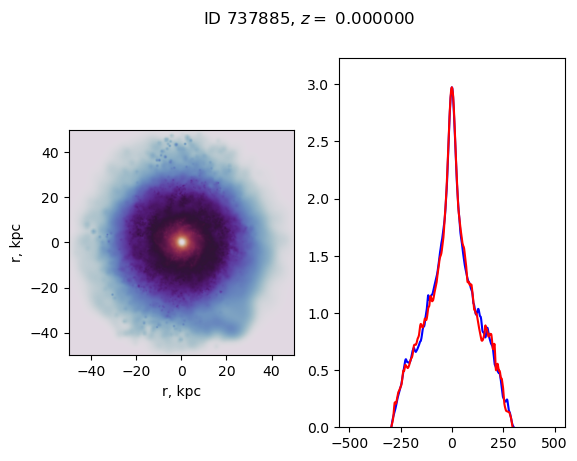

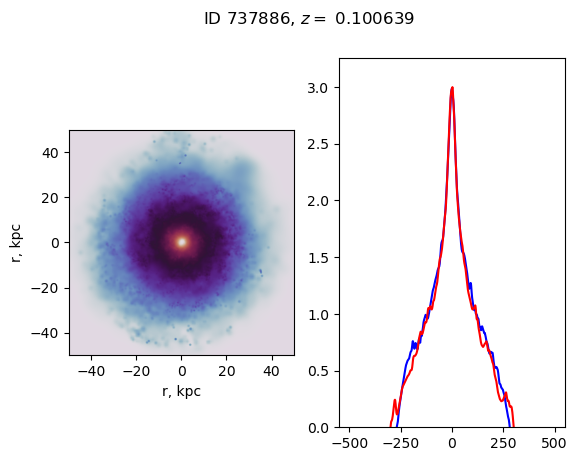

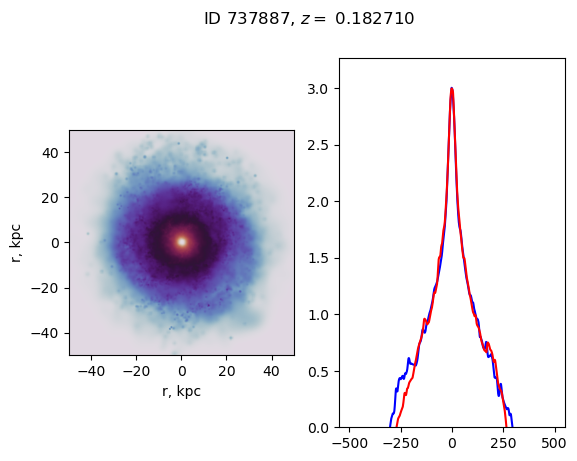

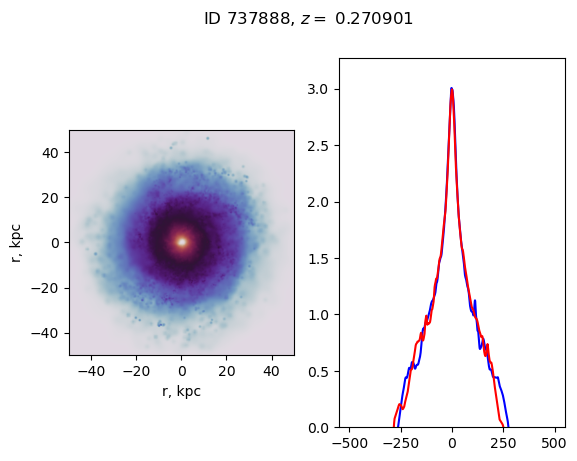

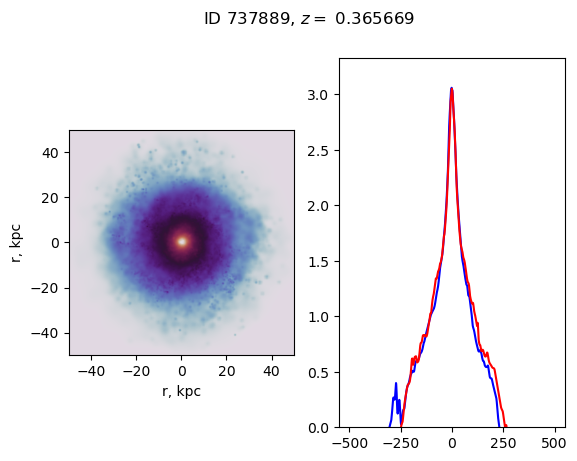

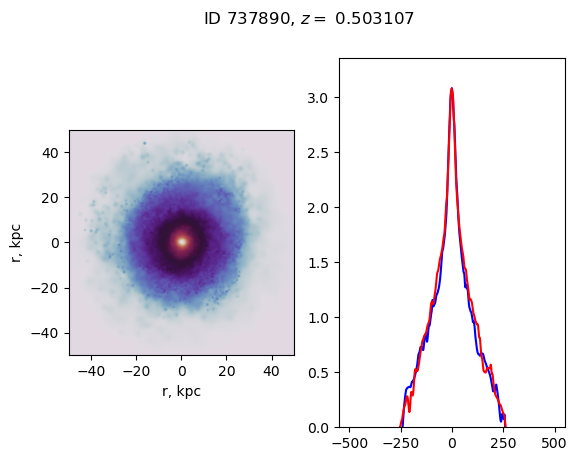

In [9]:
import os
import matplotlib.colors as mcolors

gal = galaxies[0]

tab = pd.read_csv('evolution/%s.csv' % gal, skiprows=12)
IDs = tab['GalaxyID'].to_numpy()
zs  = tab['z'].to_numpy()
xcs = tab['CentreOfPotential_x'].to_numpy() #cMpc
ycs = tab['CentreOfPotential_y'].to_numpy() #cMpc
zcs = tab['CentreOfPotential_z'].to_numpy() #cMpc

# Размер аппертуры 
region_size = 0.05 # Mpc
verbouse = False
for i, id, xc, yc, zc, z in sorted(zip(range(len(xcs)), IDs, xcs, ycs, zcs, zs)):
    zn = 28 - i 
    int_z = str(int(z))
    while len(int_z) < 3:
        int_z = '0' + int_z
    
    pz = str(int(np.round((z - int(int_z))*1000, 0)))
    
    while len(pz) < 3:
        pz = '0' + pz

    snapfile = '/media/android/KESU1/EAGLE/RecalL0025N0752_snap_0%i/RecalL0025N0752/snapshot_0%i_z%sp%s/snap_0%i_z%sp%s.0.hdf5' %(zn, zn, int_z, pz, zn, int_z, pz)
    if os.path.exists(snapfile):
        pass
        #print(snapfile)
    else: 
        continue
    #print(snapfile, i)
   
    datas = Datas(snapfile=snapfile, xc=xc, yc=yc, zc=zc, region_size=region_size, verbouse=verbouse)    
    #Cropp data with round app
    datas.cropp(app=region_size)
    
    # Main subhalo only
    datas.main_only()
    
    # Rotation of galaxy data with "shells method"
    Q = shell_fit(datas.star['coords'], datas.star['mass'], datas.star['velocity'],
                       ndots=len(datas.star['mass'])//100, method='numb', step='line', rmin=0.0, rmax=0.03)
    datas.coord_rotate(Q)
    #datas.plot_hist(datas.star)
   
    # Render images with pynbody package
    mp = my_pynbody(data=datas)
    image = mp.plot_ima('s', width=100, kernel='WendlandC2Kernel', units="Msol pc^-2", cmap="twilight"
                                                , resolution=1000, return_array=True, noplot=True)

    norm = ImageNormalize(image, interval=MinMaxInterval(), stretch=LogStretch(10_000))
            
    fig, ax = plt.subplots(1, 2)
    ext = (-50, 50, -50, 50)
    x = np.arange(0, 1000, 1)
    y = np.arange(0, 1000, 1)
    x, y = np.meshgrid(x, y)
    ax[0].imshow(image, origin='lower', norm=norm,  cmap='twilight', extent=ext)
    levels = np.logspace(1, np.log10(image.max()), 10)
    #ax[0].contour( image, levels=levels, colors='cyan', extent=ext)
    #ax[0].set_xlim(-app,app)
    #ax[0].set_ylim(-app,app)
    ax[0].set_xlabel('r, kpc')
    ax[0].set_ylabel('r, kpc')
    
    xx = np.arange(-500, 500, 1)
    ax[1].plot(xx, np.log10(image[500, :]), '-b')
    ax[1].plot(xx, np.log10(image[:, 500]), '-r')
    #ax[1].set_xlim(-app,app)
    ax[1].set_ylim(0,)
    
    plt.suptitle('ID %i, $z = $ %f' %(id, z))
    plt.show()